# Notebook para analises exploratorio de los datos

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
# From the repository of the dataset, we import the function that
# loads the fluorescence dataset
from src.load_dataset import load_fluorescence

In [2]:
fluorescence = load_fluorescence('data',as_frame=True)
df = fluorescence.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175211 entries, 0 to 175210
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   diet    175211 non-null  category
 1   mouse   175211 non-null  int64   
 2   take    175211 non-null  int64   
 3   row     175211 non-null  int64   
 4   col     175211 non-null  int64   
 5   Ca      175211 non-null  float64 
 6   Cu      175211 non-null  float64 
 7   Fe      175211 non-null  float64 
 8   K       175211 non-null  float64 
 9   Mn      175211 non-null  float64 
 10  P       175211 non-null  float64 
 11  S       175211 non-null  float64 
 12  Zn      175211 non-null  float64 
 13  label   23003 non-null   category
dtypes: category(2), float64(8), int64(4)
memory usage: 16.4 MB


In [10]:
df.sample(10)

,diet,mouse,take,row,col,Ca,Cu,Fe,K,Mn,P,S,Zn,label
155177,1,39,0,3,13,2.676170e+08,3305650.0,29433100.0,0.0,2093480.0,0.0,0.0,8489660.0,NaN
39043,2,17,0,0,8,8.320910e+08,5790400.0,23566600.0,0.0,2283830.0,0.0,9871820.0,40564200.0,NaN
171484,1,31,0,23,47,9.115970e+08,0.0,113114000.0,0.0,21780600.0,0.0,0.0,18009900.0,NaN
138991,1,28,0,87,62,7.297200e+08,5575940.0,42923400.0,0.0,0.0,7152680.0,14077600.0,37534200.0,NaN
24411,2,15,0,86,67,9.117560e+08,8570700.0,109692000.0,84412600.0,23069000.0,0.0,18401900.0,77103500.0,NaN
137429,1,28,0,74,73,6.574960e+08,8838580.0,36752200.0,0.0,0.0,0.0,14637200.0,38541800.0,NaN
71942,0,4,0,6,7,8.038580e+08,12400100.0,78377000.0,8863460.0,2197350.0,4049410.0,20742800.0,76576000.0,0.0
11079,2,14,0,83,95,1.164330e+09,0.0,94402700.0,25954000.0,4928350.0,0.0,19387000.0,37989300.0,NaN
115067,0,11,0,40,28,5.481980e+09,0.0,488266000.0,0.0,151489000.0,0.0,0.0,222822000.0,NaN
98549,0,7,0,67,51,2.177080e+09,14414600.0,543628000.0,23869500.0,11020900.0,27324000.0,51917300.0,14414600.0,NaN


In [11]:
a=df['take'].unique()
print(f'numero de dietas unicas: {df.diet.unique()}')
print(f'numero de ratones unicos: {df.mouse.unique()}')
print(f'numero de tomas unicas: {a}')


numero de dietas unicas: [2, 0, 1]
Categories (3, int64): [0, 1, 2]
numero de ratones unicos: [25 14 19 15 23 16 20 17 18 26 21  2 12  9  8  4 10  7  1 11  6 32 28 29
 33 36 38 35 39 37 30 31 27]
numero de tomas unicas: [0 1]


In [12]:
# Exemplo de dados pertencentes a la dieta 0, ratón 1 y muestra 0
df[(df['diet']==0) & (df['mouse']==1)&(df['take']==0)]

,diet,mouse,take,row,col,Ca,Cu,Fe,K,Mn,P,S,Zn,label
110398,0,1,0,0,0,108320000.0,0.0,0.0,0.0,30569400.0,0.0,0.0,9170360.0,NaN
110399,0,1,0,0,1,138667000.0,0.0,46300300.0,0.0,36677900.0,0.0,0.0,7538150.0,NaN
110400,0,1,0,0,2,165416000.0,0.0,53449900.0,0.0,38652700.0,0.0,0.0,0.0,NaN
110401,0,1,0,0,3,239937000.0,2265970.0,74283200.0,0.0,19636600.0,0.0,0.0,0.0,NaN
110402,0,1,0,0,4,433343000.0,0.0,96635300.0,0.0,38472600.0,0.0,0.0,15010500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112994,0,1,0,50,46,174746000.0,0.0,88745200.0,0.0,35438300.0,0.0,0.0,11561000.0,NaN
112995,0,1,0,50,47,148581000.0,0.0,84598300.0,0.0,28844400.0,0.0,0.0,5498540.0,NaN
112996,0,1,0,50,48,131250000.0,6618580.0,81923500.0,2635900.0,35105800.0,0.0,0.0,1754360.0,NaN
112997,0,1,0,50,49,82781000.0,0.0,71374200.0,0.0,36694700.0,0.0,0.0,0.0,NaN


In [13]:
df.columns

Index(['diet', 'mouse', 'take', 'row', 'col', 'Ca', 'Cu', 'Fe', 'K', 'Mn', 'P',
       'S', 'Zn', 'label'],
      dtype='object')

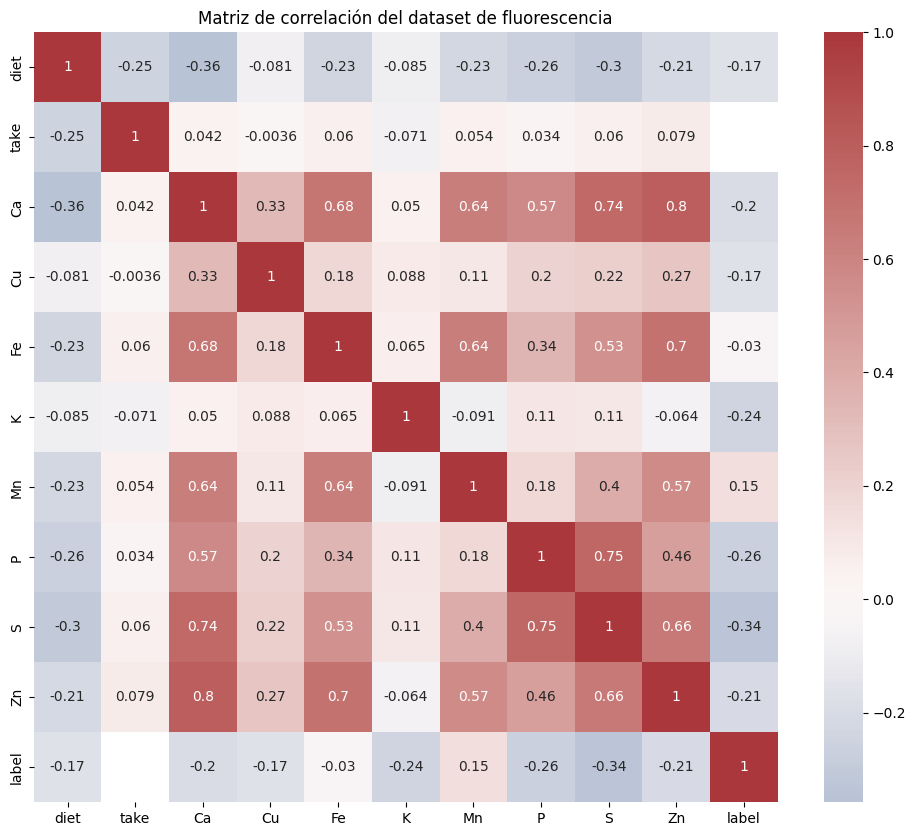

In [14]:
# Matriz de correlación considerando las variables de interés y la etiqueta 'label'
correlation_matrix = df[['diet', 'take', 'Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn','label']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", center=0)
plt.title('Matriz de correlación del dataset de fluorescencia')
plt.show()

<Figure size 1200x800 with 0 Axes>

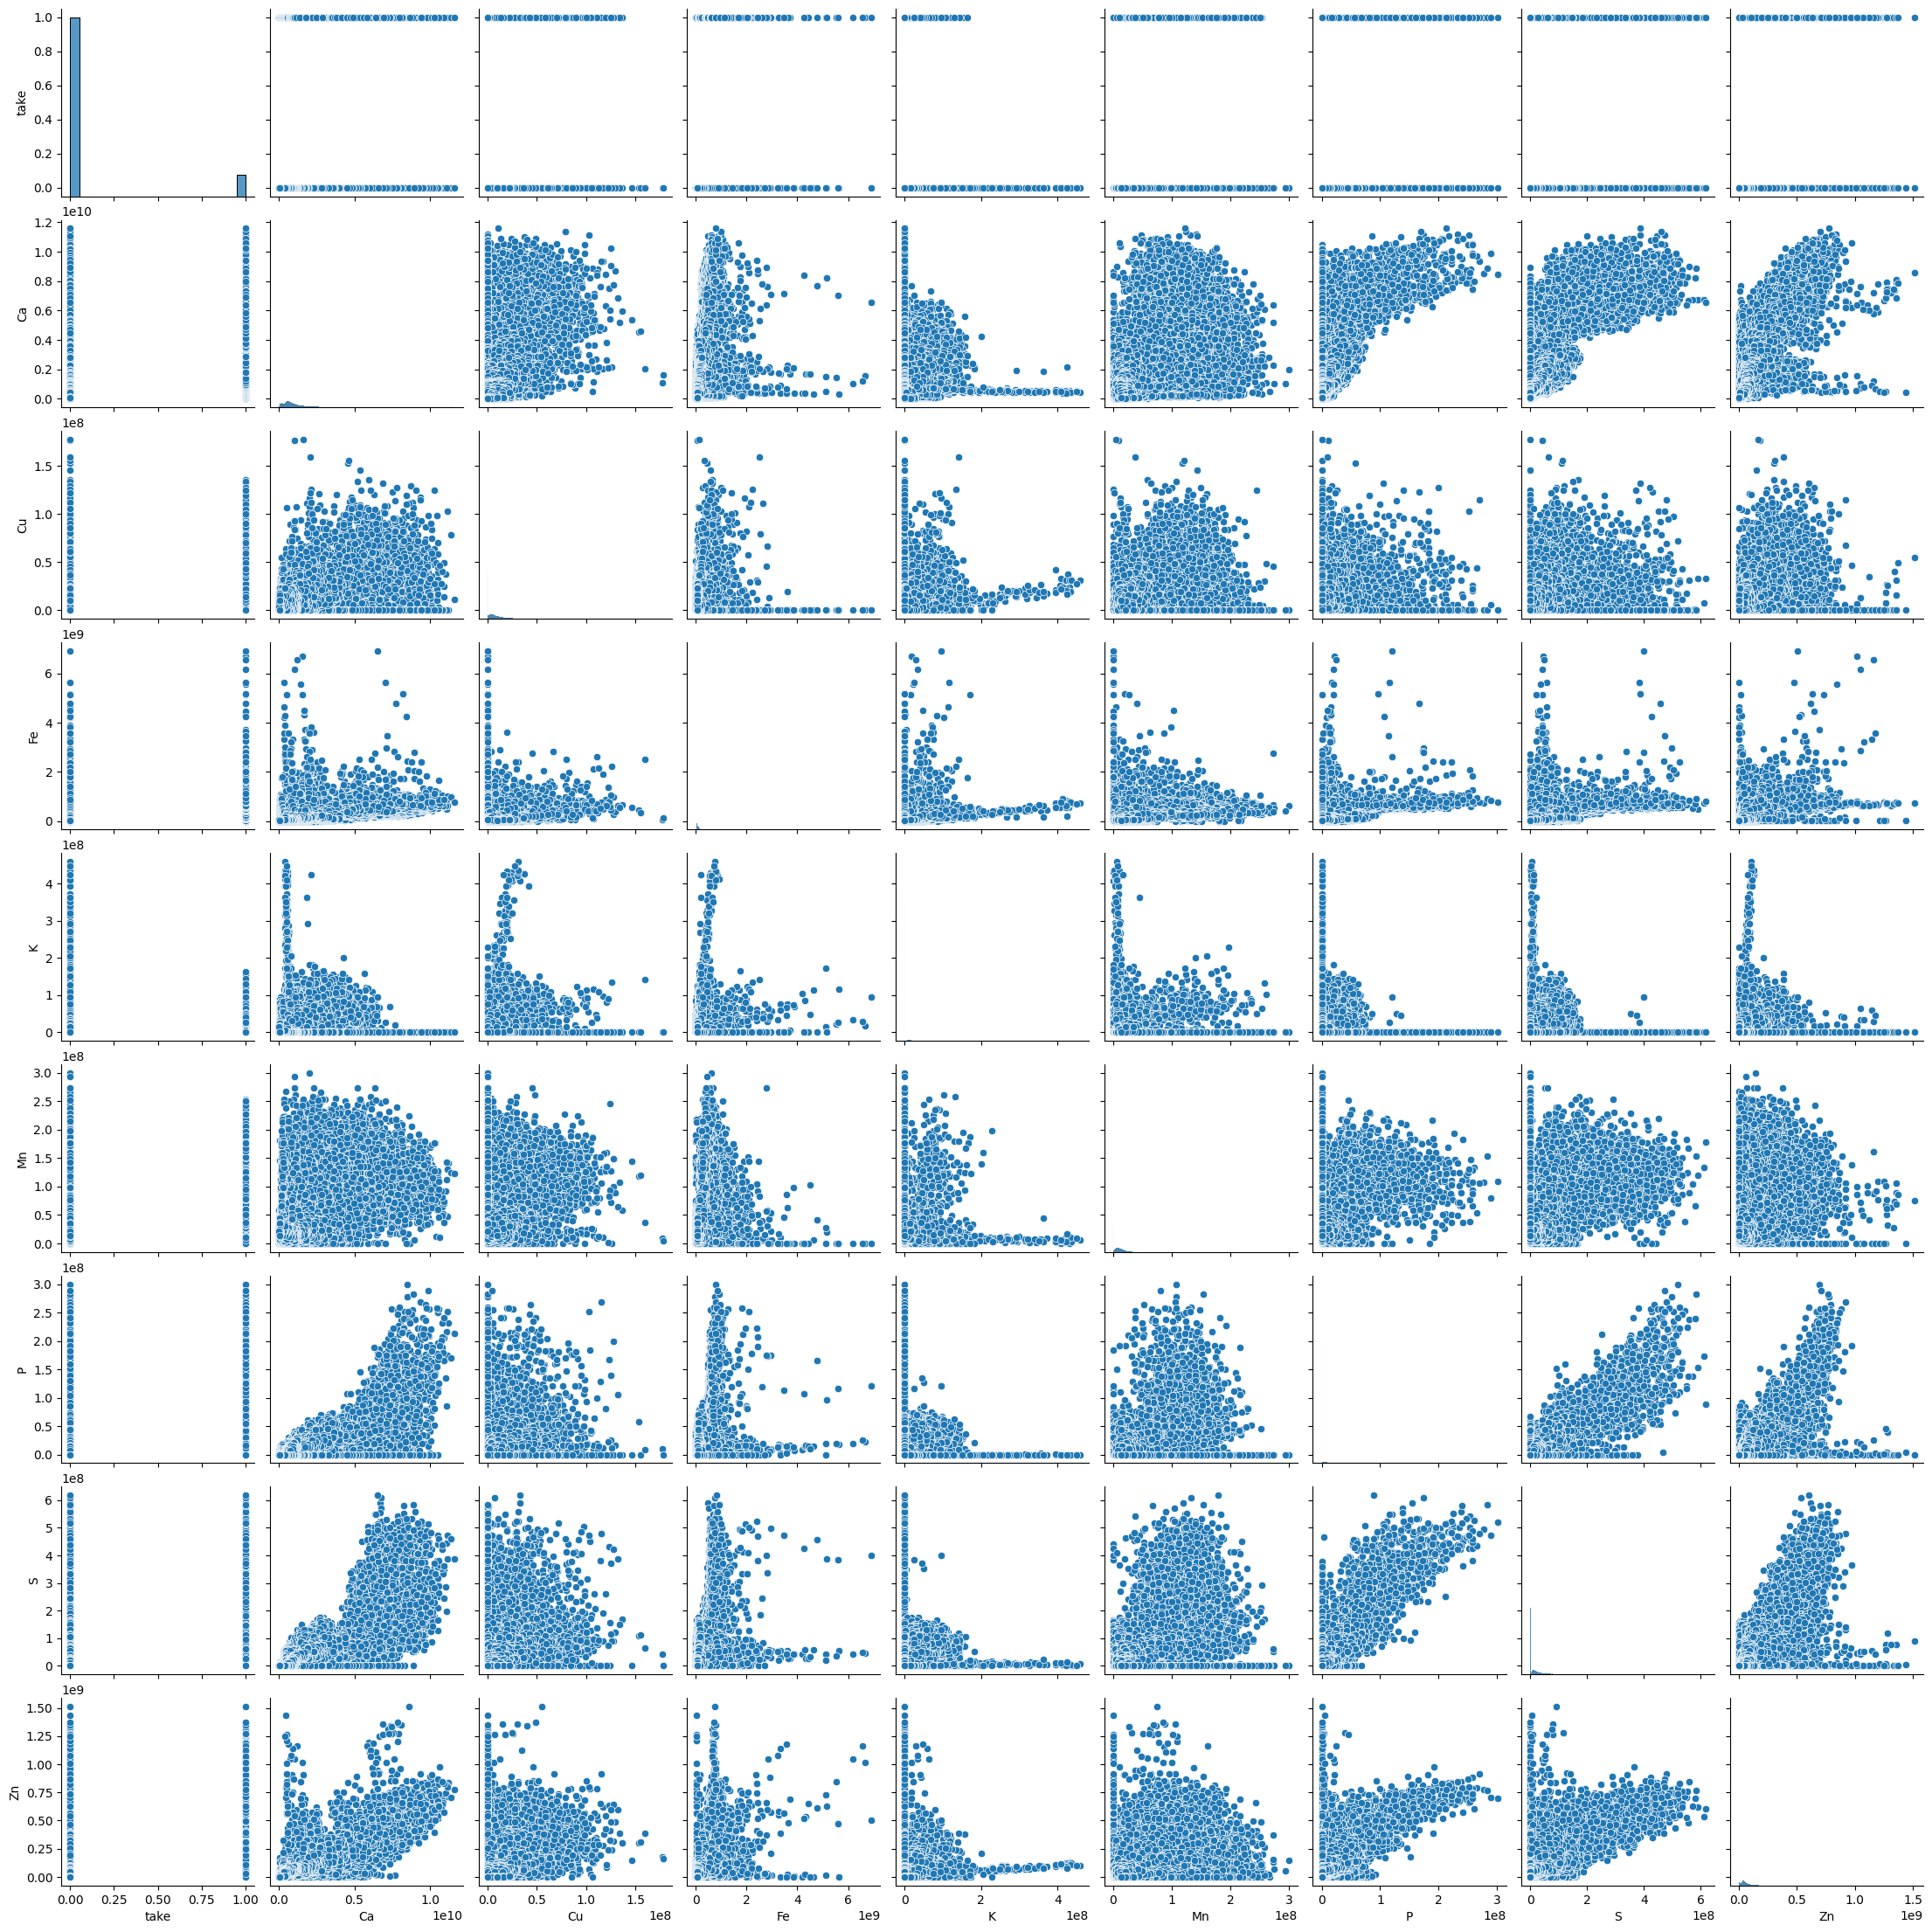

In [ ]:
# Gráfico de dispersión de las variables de interés
plt.figure(figsize=(12, 8))
sns.pairplot(data=df[['diet', 'take', 'Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn','label']])

In [16]:
df_interesting= df[['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn','label']].copy()
df_interesting[df_interesting==0].count(axis=0)

Ca           18
Cu        40210
Fe          783
K        119257
Mn        22779
P        102985
S         57251
Zn        11770
label     10102
dtype: int64

In [17]:
df_interesting[df_interesting==None].count(axis=0)

Ca       0
Cu       0
Fe       0
K        0
Mn       0
P        0
S        0
Zn       0
label    0
dtype: int64

<Axes: >

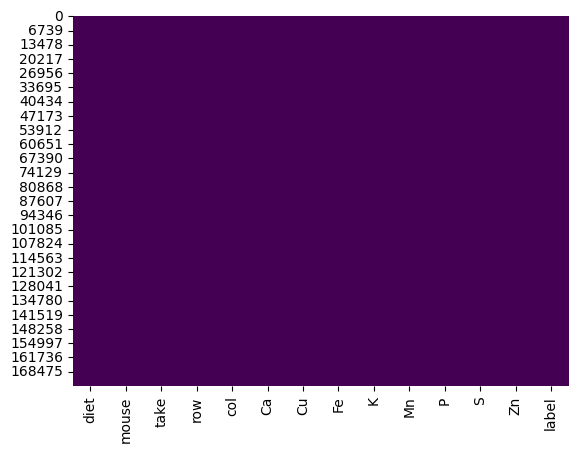

In [28]:
sns.heatmap(df==None, cbar=False, cmap='viridis')

<Axes: >

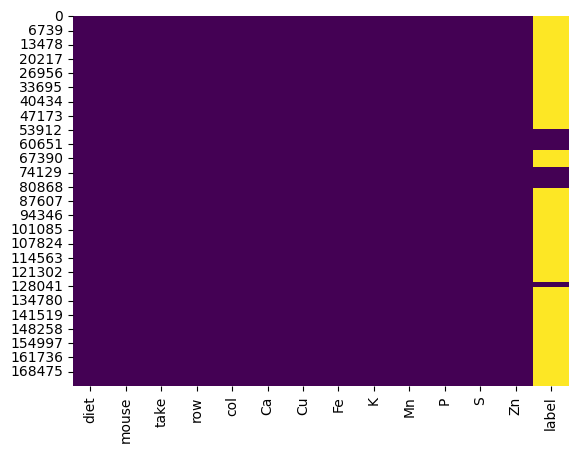

In [26]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

<Axes: >

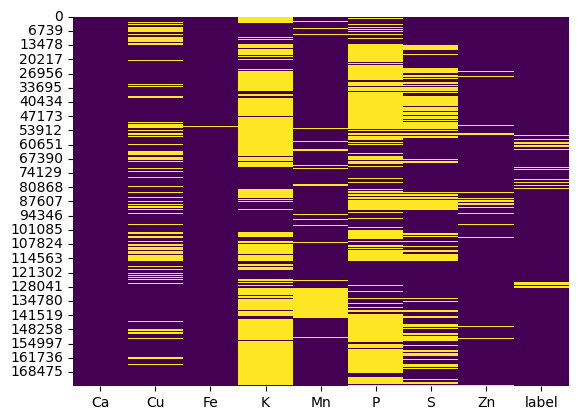

In [27]:
sns.heatmap(df_interesting==0, cbar=False, cmap='viridis')

<Figure size 1800x1200 with 0 Axes>

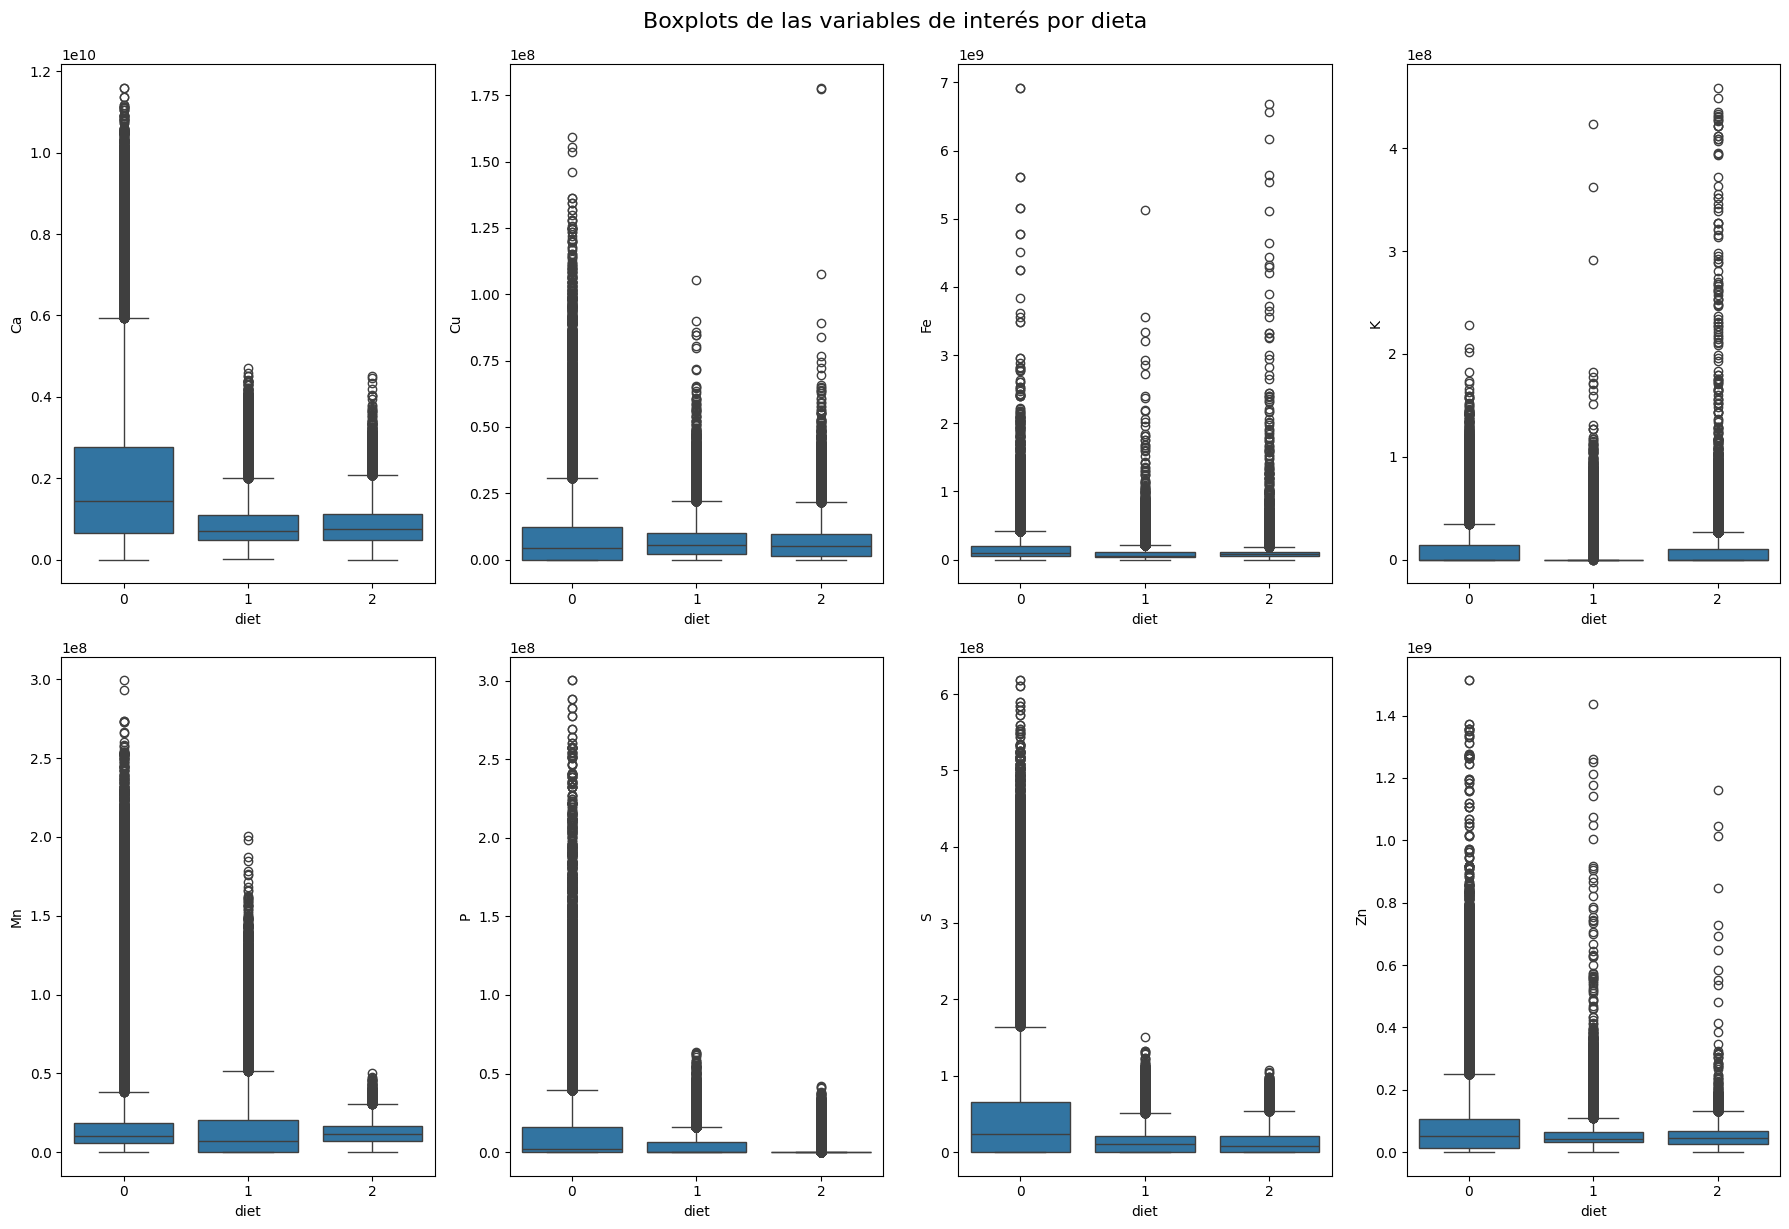

In [ ]:
# Boxplots para las variables de interés ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn'] por dieta 

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
sns.boxplot(data=df, x='diet', y='Ca', ax=axs[0][0])
sns.boxplot(data=df, x='diet', y='Cu', ax=axs[0][1])
sns.boxplot(data=df, x='diet', y='Fe', ax=axs[0][2])
sns.boxplot(data=df, x='diet', y='K', ax=axs[0][3])
sns.boxplot(data=df, x='diet', y='Mn', ax=axs[1][0])
sns.boxplot(data=df, x='diet', y='P', ax=axs[1][1])
sns.boxplot(data=df, x='diet', y='S', ax=axs[1][2])
sns.boxplot(data=df, x='diet', y='Zn', ax=axs[1][3])
plt.tight_layout()
plt.suptitle('Boxplots de las variables de interés por dieta', fontsize=16, y=1.02)
plt.show()

<Figure size 1800x1800 with 0 Axes>

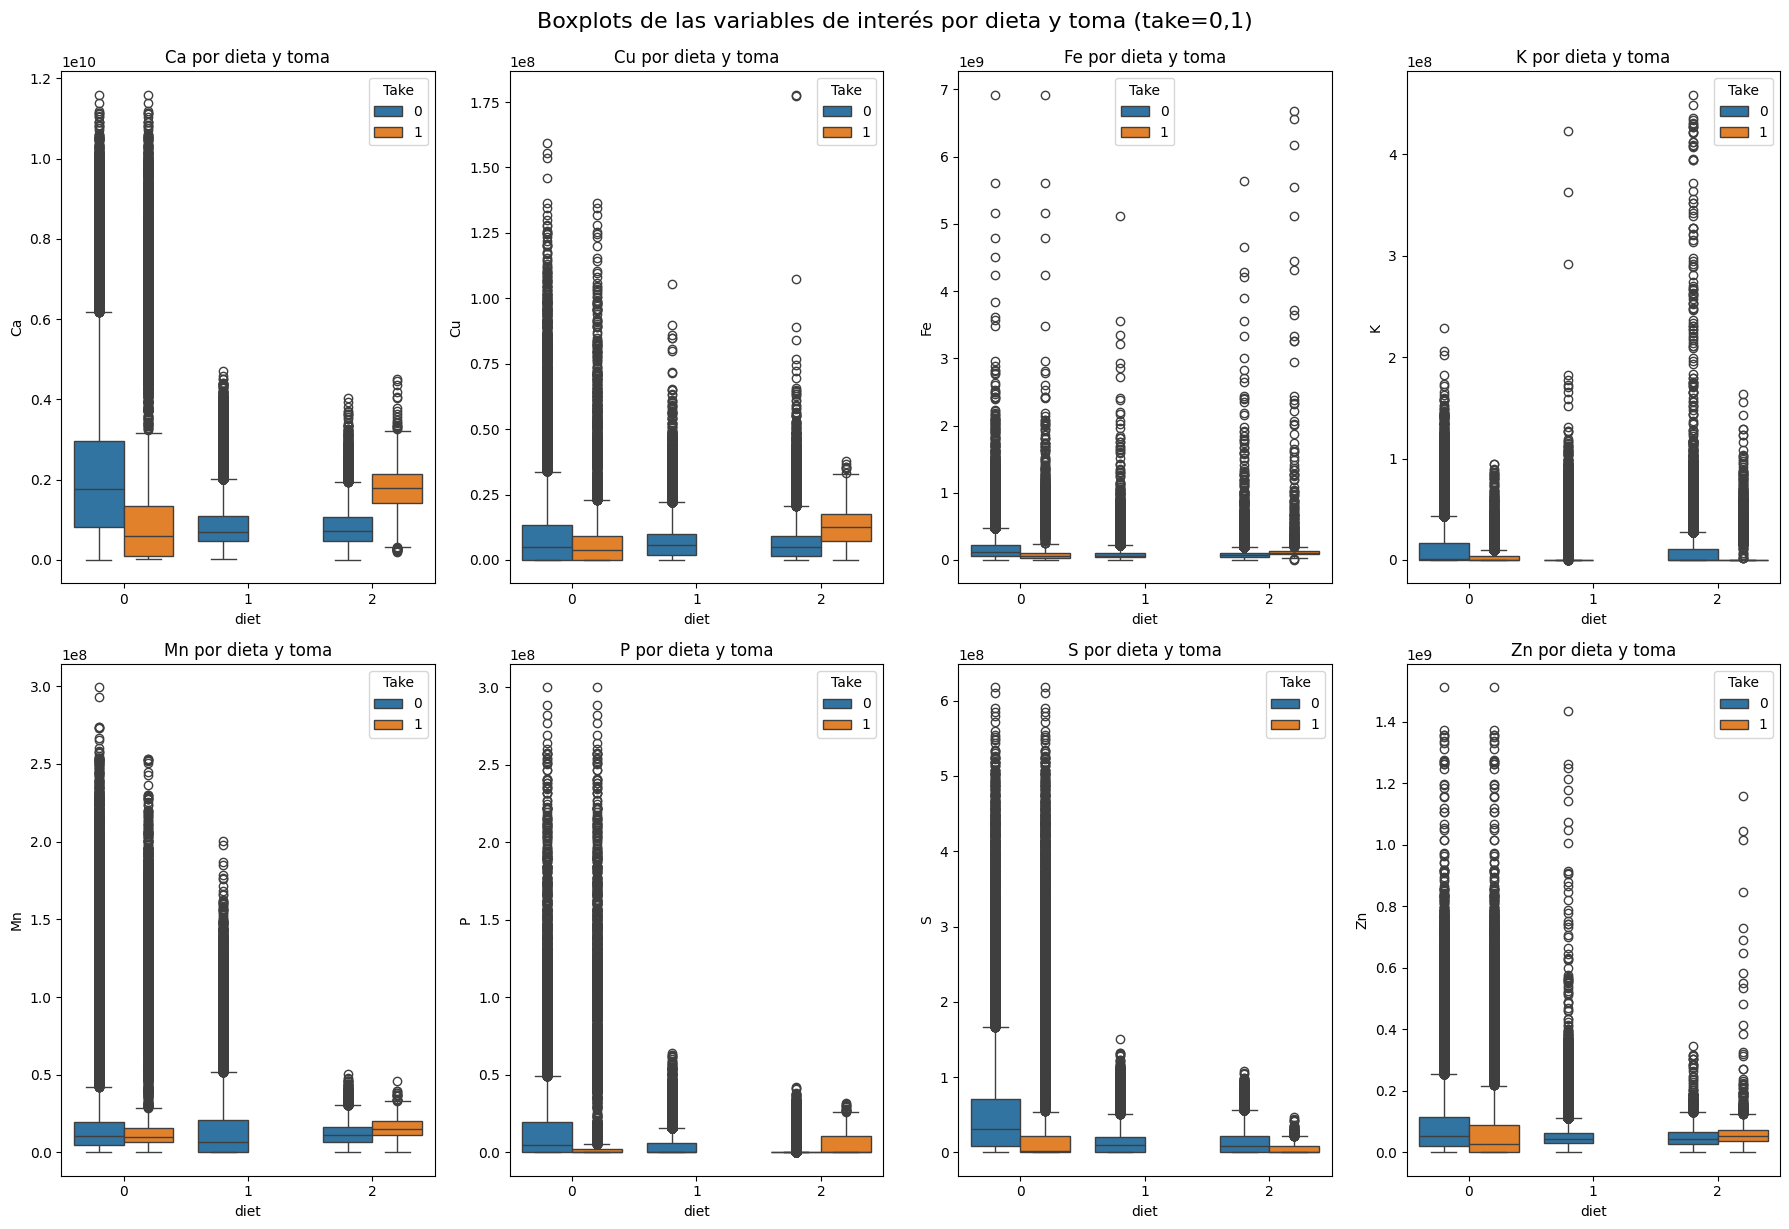

In [24]:
# Boxplots para las variables de interés ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn'] por dieta y toma (take=0,1)
plt.figure(figsize=(18, 18))
fig2, axs2 = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
variables = ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']

for i, var in enumerate(variables):
    row, col = divmod(i, 4)
    sns.boxplot(data=df[df['take'].isin([0, 1])], x='diet', y=var, hue='take', ax=axs2[row][col])
    axs2[row][col].set_title(f'{var} por dieta y toma')
    axs2[row][col].legend(title='Take', loc='best')

plt.tight_layout()
plt.suptitle('Boxplots de las variables de interés por dieta y toma (take=0,1)', fontsize=16, y=1.02)
plt.show()

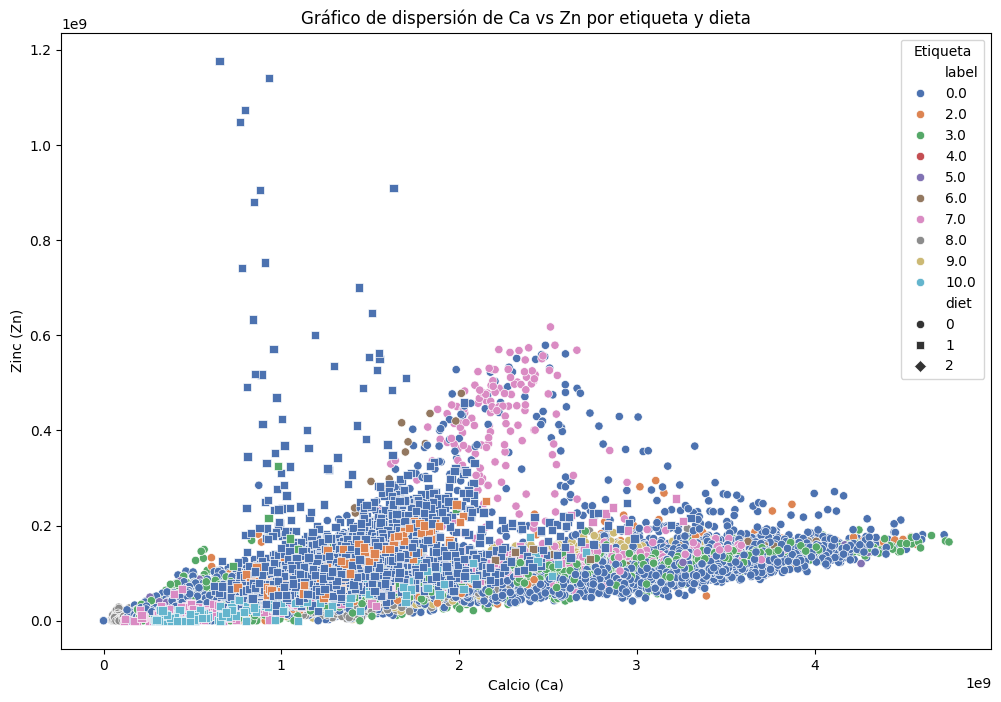

In [ ]:
# Gráfico de dispersión de las variables de interés
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Ca', y='Zn', hue='label', style='diet', palette='deep', markers=['o', 's', 'D'])
plt.title('Gráfico de dispersión de Ca vs Zn por etiqueta y dieta')
plt.xlabel('Calcio (Ca)')
plt.ylabel('Zinc (Zn)')
plt.legend(title='Etiqueta', loc='upper right')
plt.show()


In [15]:
sample_number = 3
element_number = 0

print(f"Take {fluorescence.take[sample_number]} of mouse {fluorescence.mouse[sample_number]}, whose diet was {fluorescence.diet[sample_number]},")
print(f"had the fluorescence of {fluorescence.element_order[element_number]} shown in image \n\n{fluorescence.images[sample_number][element_number]}.")

Take 0 of mouse 15, whose diet was 2,
had the fluorescence of Ca shown in image 

[[3.89817e+08 6.66134e+06 5.79963e+07 1.19037e+07 1.14485e+07 0.00000e+00
  0.00000e+00 2.45958e+07]
 [4.34480e+08 2.88441e+06 6.62135e+07 9.27540e+06 7.71183e+06 0.00000e+00
  0.00000e+00 3.87666e+07]
 [6.30241e+08 9.24821e+06 7.11284e+07 1.74389e+07 6.69054e+06 0.00000e+00
  0.00000e+00 8.81568e+07]
 [6.18219e+08 8.67291e+06 9.23644e+07 1.05607e+07 2.85403e+06 0.00000e+00
  5.14238e+06 9.35630e+07]
 [7.43641e+08 9.85781e+06 7.79961e+07 2.01398e+07 1.25902e+07 0.00000e+00
  0.00000e+00 8.80665e+07]
 [7.40416e+08 1.05889e+07 8.91138e+07 1.03997e+07 1.42377e+07 0.00000e+00
  0.00000e+00 6.43937e+07]
 [9.03072e+08 8.25912e+06 1.06659e+08 2.60079e+07 8.11203e+06 0.00000e+00
  1.20529e+07 7.37300e+07]
 [9.09386e+08 7.67063e+06 1.38071e+08 2.16839e+07 1.80133e+07 0.00000e+00
  1.51914e+07 6.14876e+07]
 [8.39397e+08 8.93640e+06 2.89521e+08 6.95390e+06 1.00973e+07 0.00000e+00
  1.38570e+07 4.06224e+07]
 [9.08875